# Atividade 02 - Meteorologia
Alunas: Suelen Silva Oliveira, Vitoria Borges Bulhoes e Yasmin Lieh Sakamoto.

## Guararapes - Indústria de fabricação painéis de MDF
Atividade referente ao capítulo 10.6.3 da AP42, que se refere a Painel de fibra de média densidade. \
https://www.epa.gov/sites/default/files/2020-10/documents/c10s0603.pdf

Dados do estudo:
* Localização da indústria: Rod. Avelino Mandeli, s/n - KM 01 - Aeroporto, Caçador - SC, 89500-000.
* Estação meteorológica mais próxima: 
* Sondagem mais próxima:

Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR

O objetivo desta atividade é a análise das condições meteorológicas para realizar o estudo de dispersão de poluentes atmosféricos. A análise será feita em três etapas:

## 1 - Analise da condição meteorológica de superfície (estação meteorológica).

### Condições meteorológicas no ano de 2023:

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 
from windrose import WindroseAxes
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [82]:
# Selecionar arquivo para a análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath + '\\inputs\\meteoSuperficie'
print (metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

r'C:\Users\vinicius\Documents\ENS5173_202401'
r'C:\Users\vinicius\Documents\ENS5173_202401\inputs\meteoSuperficie'

C:\Users\vinicius\Documents\ENS5173_202401
C:\Users\vinicius\Documents\ENS5173_202401\inputs\meteoSuperficie
['metar_2023.csv']


'C:\\Users\\vinicius\\Documents\\ENS5173_202401\\inputs\\meteoSuperficie'

In [83]:
# Abrindo os arquivos metar
metSuperficie = []
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [84]:
# Criar uma coluna com DateTime dos dados

#Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day','hour']])
print(metSuperficie['datetime'])          

metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


### Figuras da série temporal bruta

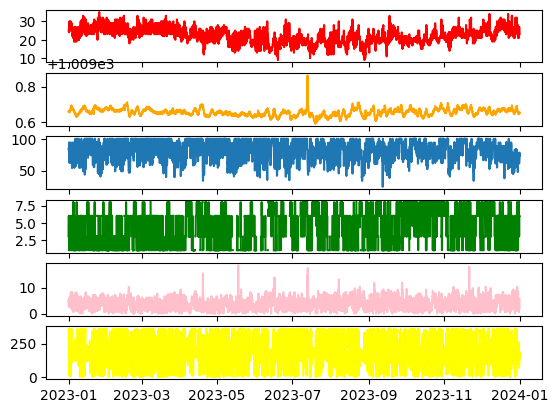

In [85]:
# Analisando os dados através de figuras
fig,ax = plt.subplots(6,sharex=True)
ax[0].plot(metSuperficie['datetime'], metSuperficie['temp'], color = 'red')
ax[1].plot(metSuperficie['datetime'], metSuperficie['p'], color = 'orange')
ax[2].plot(metSuperficie['datetime'], metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'], metSuperficie['cco'], color = 'green')
ax[3].tick_params(axis='x', rotation=45) # -> ver como faz a rotação de eixo
ax[4].plot(metSuperficie['datetime'], metSuperficie['ws'], color = 'pink')
ax[5].plot(metSuperficie['datetime'], metSuperficie['wd'], color = 'yellow')

# metSuperficie['temp'].plot(ax=ax[0]) #uma forma de criar figura

Com esta figura podemos avaliar os dados, por exemplo no gráfico em amarelo, temos um dado bem fora do comum, o que indica uma medição errada, conseguimos retirar esse dado.

In [86]:
# Estatísticas dos dados
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()

print(media_mensal)

# A partir disso podemos criar gráfico de barras por mês, gráfico de mudanças climáticas e etc.

                  day  month    year       hour  ct          wd        ws  \
datetime                                                                    
2023-01-31  16.000000    1.0  2023.0  11.500000 NaN  203.930861  3.819839   
2023-02-28  14.493294    2.0  2023.0  11.500745 NaN  211.994368  3.374681   
2023-03-31  16.000000    3.0  2023.0  11.500000 NaN  212.134089  3.262525   
2023-04-30  15.500000    4.0  2023.0  11.500000 NaN  229.672012  3.304112   
2023-05-31  16.000000    5.0  2023.0  11.500000 NaN  248.224432  3.329711   
2023-06-30  15.500000    6.0  2023.0  11.500000 NaN  254.177680  3.727099   
2023-07-31  16.000000    7.0  2023.0  11.500000 NaN  244.600753  3.672328   
2023-08-31  16.000000    8.0  2023.0  11.500000 NaN  233.475650  4.191693   
2023-09-30  15.500000    9.0  2023.0  11.500000 NaN  230.095923  4.188015   
2023-10-31  16.000000   10.0  2023.0  11.500000 NaN  214.431250  3.726607   
2023-11-30  15.484006   11.0  2023.0  11.510431 NaN  205.173410  4.022299   

C:\Users\vinicius\AppData\Local\Temp\ipykernel_9664\2282380692.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()


### Remoção dos dados discrepantes - Boxplot

array([<Axes: xlabel='temp'>, <Axes: xlabel='relh'>, <Axes: xlabel='p'>,
       <Axes: xlabel='cco'>, <Axes: xlabel='ws'>, <Axes: xlabel='wd'>],
      dtype=object)

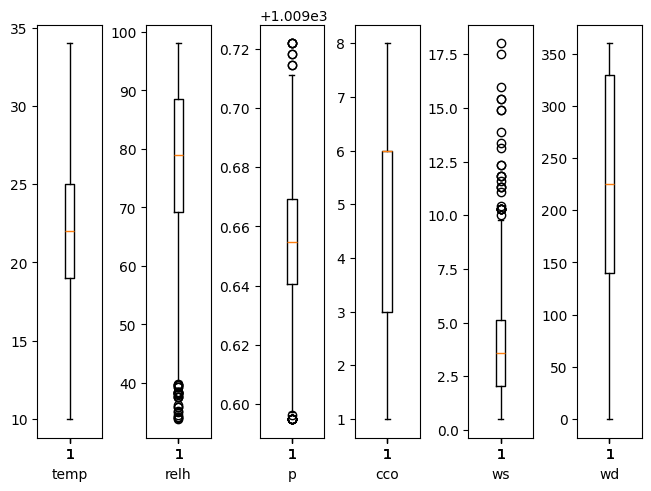

In [87]:
# Função para criar boxplot 
def boxplot(dados, colunas, percMin, percMax,):
    fig,ax = plt.subplots(1, len(colunas), sharex=True, constrained_layout=True)
    for i in range(len(colunas)):
        if colunas[i] in dados:
            if np.isnan(np.percentile(dados[colunas[i]], percMin) and np.percentile(dados[colunas[i]], percMax)) == False: 
                ax[i].boxplot(dados[colunas[i]]
                          [(dados[colunas[i]] < np.percentile(dados[colunas[i]], percMax)) & 
                          (dados[colunas[i]] > np.percentile(dados[colunas[i]], percMin))])
            else:
                ax[i].boxplot(dados[colunas[i]][~np.isnan(dados[colunas[i]])])
            ax[i].set_xlabel(colunas[i]) 
    return ax

# Dados brutos
boxplot(metSuperficie, analisar, 0, 100) 

In [88]:
# Identificando valores dos percentis 0.5 e 99
for i in range(len(analisar)):
    if (analisar[i] in metSuperficie):
        aux1 = np.percentile(metSuperficie[analisar[i]], 0.5)
        aux2 = np.percentile(metSuperficie[analisar[i]], 99)
        print('O percentil 0.5 da ' +str(analisar[i]) +' é '+str(aux1)) 
        print('O percentil 99 da '+str(analisar[i])+' é '+str(aux2)+'\n') 

O percentil 0.5 da temp é 12.0
O percentil 99 da temp é 31.0

O percentil 0.5 da relh é 41.71
O percentil 99 da relh é 100.0

O percentil 0.5 da p é 1009.6045256529728
O percentil 99 da p é 1009.6967607391396

O percentil 0.5 da cco é nan
O percentil 99 da cco é nan

O percentil 0.5 da ws é 0.0
O percentil 99 da ws é 8.745548

O percentil 0.5 da wd é nan
O percentil 99 da wd é nan



array([<Axes: xlabel='temp'>, <Axes: xlabel='relh'>, <Axes: xlabel='p'>,
       <Axes: xlabel='cco'>, <Axes: xlabel='ws'>, <Axes: xlabel='wd'>],
      dtype=object)

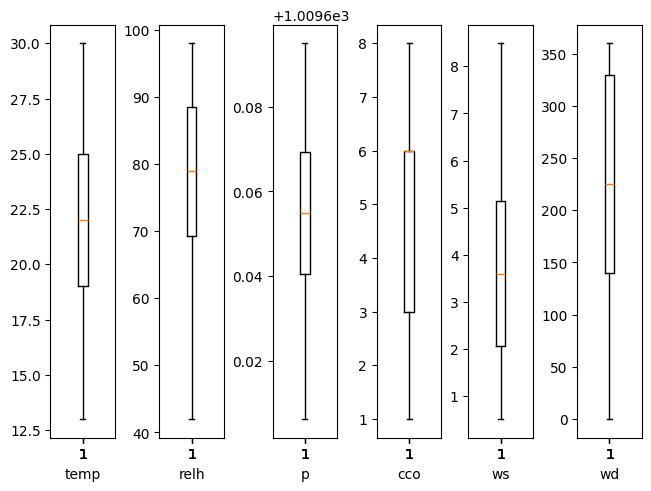

In [65]:
# Dados tratados
boxplot(metSuperficie, analisar, 0.5, 99) 

### Gráfico das médias mensais

C:\Users\vinicius\AppData\Local\Temp\ipykernel_9664\3688127675.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()


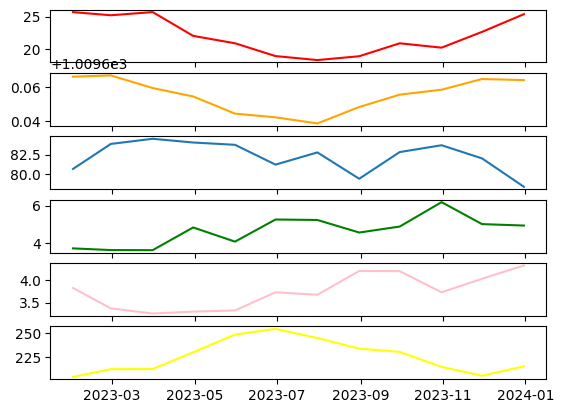

In [89]:
# Estatísticas dos dados
#metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()

#Criando figuras após fazer a média mensal
fig,ax = plt.subplots(6,sharex=True)
ax[0].plot(media_mensal.index,media_mensal['temp'], color = 'red')
ax[1].plot(media_mensal.index,media_mensal['p'], color = 'orange')
ax[2].plot(media_mensal.index,media_mensal['relh'])
ax[3].plot(media_mensal.index,media_mensal['cco'], color = 'green')
ax[4].plot(media_mensal.index,media_mensal['ws'], color = 'pink')
ax[5].plot(media_mensal.index,media_mensal['wd'], color = 'yellow')

ax[3].tick_params(axis='x', rotation=45) # -> ver como faz a rotação de eixo

# A partir disso podemos criar gráfico de barras por mês, gráfico de mudanças climáticas e etc.

### Gráfico das médias mensais representando as mínimas e máximas mensais

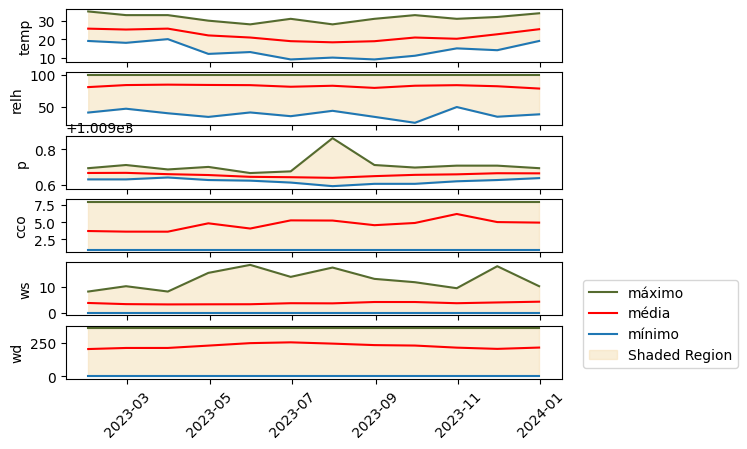

In [90]:
# Estatísticas 
media_mensal = metSuperficie.resample('ME').mean()
min_mensal = metSuperficie.resample('ME').min()
max_mensal = metSuperficie.resample('ME').max()

# Figuras da série temporal 
fig,ax = plt.subplots(len(analisar),sharex=True)
for i in range(len(analisar)):
    if analisar[i] in metSuperficie:
        ax[i].plot(media_mensal.index, max_mensal[analisar[i]], color='darkolivegreen', label='máximo')
        ax[i].plot(media_mensal.index, media_mensal[analisar[i]],color='red', label='média')
        ax[i].plot(media_mensal.index, min_mensal[analisar[i]], label='mínimo')
        ax[i].fill_between(media_mensal.index, min_mensal[analisar[i]], max_mensal[analisar[i]], color='wheat', alpha=0.5, label='Shaded Region')
        ax[i].set_ylabel(analisar[i]) 
ax[-1].tick_params(axis='x', rotation=45)
plt.legend(bbox_to_anchor=(1.03, 2)) 
plt.show() 

### Rosa dos ventos

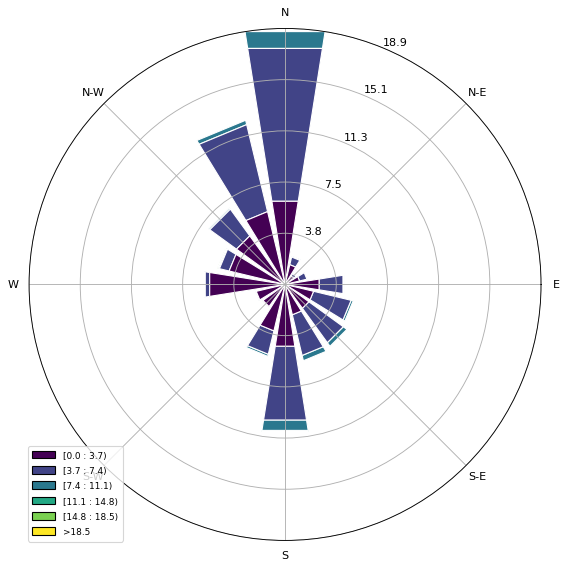

In [91]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

Discussão sobre as condições meteorológicas do local e possíveis reflexos na qualidade do ar.

## 2 - Análise do perfil de temperatura - Pacote Siphon
Os dados analisados dados de 0 e 12 horas durante 10 dias, sendo 5 no verão e 5 no inverno.

In [101]:
# Função para analisar o perfil da atmosférica

def perfil(temp, alt, dia):
    deltaT = np.diff(temp)
    deltaZ = np.diff(alt)
    dTdZ = (deltaT/deltaZ)*100 # Gradiente de temperatura; a cada 100 m    
    fig,ax = plt.subplots() # Criando figura do perfil de temperatura 
    ax.plot(temp, alt, lw=2, label='Estável')  
    
    primeira_iteracao = True # variável auxiliar para evitar rótulos repetidos na legenda 
    for i in range(len(dTdZ)):
        if dTdZ[i] > 0: # inversão 
            if primeira_iteracao:
                ax.plot(temp[i], alt[i], color='blue', marker='X', label='Inversão')
                primeira_iteracao = False
            else:
                ax.plot(temp[i], alt[i], color='blue', marker='X')  

    primeira_iteracao = True
    for i in range(len(dTdZ)):
        if -1 < dTdZ[i] < -0.98: # neutro 
            if primeira_iteracao:
                ax.plot(temp[i], alt[i], color='black', marker='o', label='Neutro')
                primeira_iteracao = False
            else:
                ax.plot(temp[i], alt[i], color='black', marker='o')
    
    primeira_iteracao = True
    for i in range(len(dTdZ)):
        if dTdZ[i] < -1: # instável
            if primeira_iteracao:
                ax.plot(temp[i], alt[i], color='red', marker='s', label='Instável')
                primeira_iteracao = False
            else:
                ax.plot(temp[i], alt[i], color='red', marker='s')
                                         
    ax.set_title('Perfil de temperatura '+ dia)
    ax.set_xlabel('Temperatura (°C)')
    ax.set_ylabel('Altura (m)') 
    ax.legend()
    return ax

In [98]:
# Datas para análise no inverno (10-15/07/2023)
date = pd.date_range(start='2023-07-10', end='2023-07-15', freq='12h')
# local da análise
station = 'SBFL' 

In [99]:
for i in range(len(date)):
    df = WyomingUpperAir.request_data(date[i], station) # Extraindo os dados
    perfil(df['temperature'], df['height'], date[i].strftime('%d/%m/%Y %H:%M')) 

ConnectionError: HTTPConnectionPool(host='weather.uwyo.edu', port=80): Max retries exceeded with url: /cgi-bin/sounding/?region=naconf&TYPE=TEXT%3ALIST&YEAR=2023&MONTH=07&FROM=1000&TO=1000&STNM=SBFL (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x00000184EB844690>: Failed to resolve 'weather.uwyo.edu' ([Errno 11002] getaddrinfo failed)"))

In [100]:
# Datas para análise no verão (05-10/01/2023)
date = pd.date_range(start='2023-01-05', end='2023-01-10', freq='12h')
for i in range(len(date)):
    df = WyomingUpperAir.request_data(date[i], station) # Extraindo os dados
    perfil(df['temperature'], df['height'], date[i].strftime('%d/%m/%Y %H:%M')) 

ConnectionError: HTTPConnectionPool(host='weather.uwyo.edu', port=80): Max retries exceeded with url: /cgi-bin/sounding/?region=naconf&TYPE=TEXT%3ALIST&YEAR=2023&MONTH=01&FROM=0500&TO=0500&STNM=SBFL (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x00000184EBF5DC50>: Failed to resolve 'weather.uwyo.edu' ([Errno 11002] getaddrinfo failed)"))

['Best GFS Quarter Degree Forecast Time Series']
['reftime', 'latitude', 'time', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


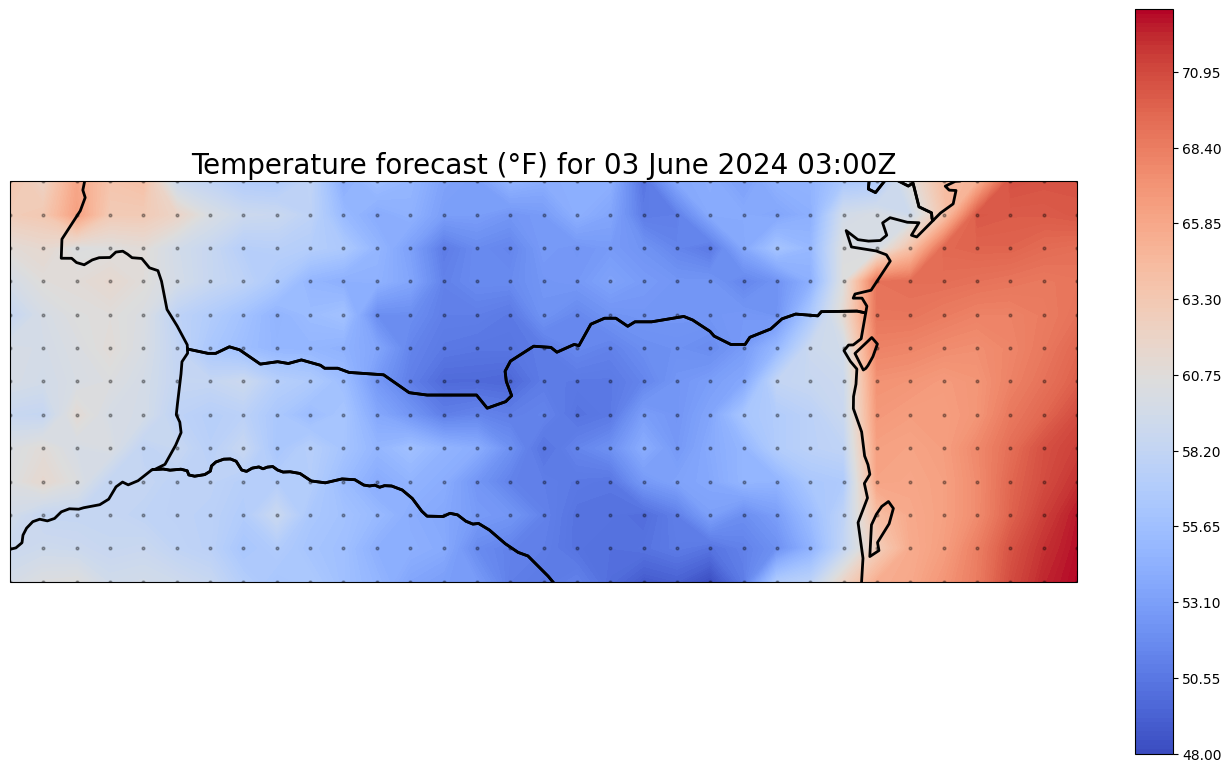

In [34]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface'] #Pode ser analisado com outras variáveis.

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55., -47., -28, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')